In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#here we are loading data using pandas
df=pd.read_csv(r'C:\Users\Hp\Downloads\archive (4) (1).zip')

In [3]:
df


,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...,...,...
2506,2528,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2529,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2530,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2531,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8


In [4]:
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [5]:
df.tail()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
2506,2528,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2529,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2530,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2531,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8
2510,2532,2014-01-22,1238.6,80262.0,1240.5,1243.5,1235.5


In [6]:
df.isnull().sum()

Unnamed: 0    0
Date          0
Close         0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['Date']=pd.to_datetime(df['Date'])
df['dayofweek']=df['Date'].dt.dayofweek
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [9]:
df1 = df.drop(df.columns[1], axis=1)
df1


,Unnamed: 0,Close,Volume,Open,High,Low,dayofweek,Month,Year
0,0,2029.3,166078.0,2027.4,2041.9,2022.2,4,1,2024
1,1,2021.6,167013.0,2009.1,2025.6,2007.7,3,1,2024
2,2,2006.5,245194.0,2031.7,2036.1,2004.6,2,1,2024
3,3,2030.2,277995.0,2053.4,2062.8,2027.6,1,1,2024
4,4,2051.6,250946.0,2033.2,2067.3,2033.1,4,1,2024
...,...,...,...,...,...,...,...,...,...
2506,2528,1250.5,81426.0,1254.9,1261.9,1248.0,1,1,2014
2507,2529,1263.5,63419.0,1269.9,1280.1,1252.0,0,1,2014
2508,2530,1264.5,34998.0,1264.3,1273.2,1256.9,4,1,2014
2509,2531,1262.5,41697.0,1235.1,1267.1,1230.8,3,1,2014


In [10]:
df2 = df1.drop(df1.columns[0], axis=1)
df2

,Close,Volume,Open,High,Low,dayofweek,Month,Year
0,2029.3,166078.0,2027.4,2041.9,2022.2,4,1,2024
1,2021.6,167013.0,2009.1,2025.6,2007.7,3,1,2024
2,2006.5,245194.0,2031.7,2036.1,2004.6,2,1,2024
3,2030.2,277995.0,2053.4,2062.8,2027.6,1,1,2024
4,2051.6,250946.0,2033.2,2067.3,2033.1,4,1,2024
...,...,...,...,...,...,...,...,...
2506,1250.5,81426.0,1254.9,1261.9,1248.0,1,1,2014
2507,1263.5,63419.0,1269.9,1280.1,1252.0,0,1,2014
2508,1264.5,34998.0,1264.3,1273.2,1256.9,4,1,2014
2509,1262.5,41697.0,1235.1,1267.1,1230.8,3,1,2014


In [11]:

Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_cleaned = df2[~((df2 < lower_bound) | (df2 > upper_bound)).any(axis=1)]

print("Original Data:")
print(df2)

print("\nCleaned Data:")
print(data_cleaned)


Original Data:
       Close    Volume    Open    High     Low  dayofweek  Month  Year
0     2029.3  166078.0  2027.4  2041.9  2022.2          4      1  2024
1     2021.6  167013.0  2009.1  2025.6  2007.7          3      1  2024
2     2006.5  245194.0  2031.7  2036.1  2004.6          2      1  2024
3     2030.2  277995.0  2053.4  2062.8  2027.6          1      1  2024
4     2051.6  250946.0  2033.2  2067.3  2033.1          4      1  2024
...      ...       ...     ...     ...     ...        ...    ...   ...
2506  1250.5   81426.0  1254.9  1261.9  1248.0          1      1  2014
2507  1263.5   63419.0  1269.9  1280.1  1252.0          0      1  2014
2508  1264.5   34998.0  1264.3  1273.2  1256.9          4      1  2014
2509  1262.5   41697.0  1235.1  1267.1  1230.8          3      1  2014
2510  1238.6   80262.0  1240.5  1243.5  1235.5          2      1  2014

[2511 rows x 8 columns]

Cleaned Data:
       Close    Volume    Open    High     Low  dayofweek  Month  Year
0     2029.3  166078.0

<Axes: >

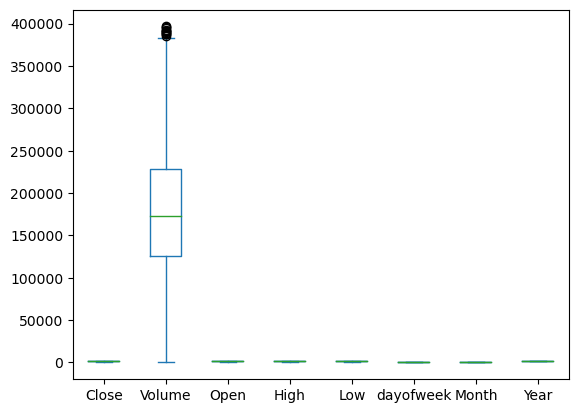

In [12]:
data_cleaned.plot(kind='box')

In [13]:
#Summary statistics
data_cleaned.describe()

,Close,Volume,Open,High,Low,dayofweek,Month,Year
count,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000
mean,1498.066147,176976.345917,1497.833238,1507.382725,1488.429093,2.019286,6.554370,2018.528929
std,301.038475,82812.354274,301.184398,303.356911,298.731184,1.400811,3.441396,2.914153
min,1049.600000,1.000000,1051.500000,1062.700000,1045.400000,0.000000,1.000000,2014.000000
25%,1247.400000,125228.000000,1247.000000,1255.100000,1240.700000,1.000000,4.000000,2016.000000
50%,1329.500000,172801.000000,1330.800000,1337.600000,1323.600000,2.000000,7.000000,2018.000000
75%,1807.200000,228720.000000,1807.400000,1816.500000,1794.100000,3.000000,10.000000,2021.000000
max,2093.100000,396657.000000,2094.400000,2098.200000,2074.600000,4.000000,12.000000,2024.000000


In [14]:
#correlation matrix
correlation_matrix=data_cleaned.corr()
correlation_matrix

,Close,Volume,Open,High,Low,dayofweek,Month,Year
Close,1.000000,0.019988,0.999130,0.999623,0.999616,0.008208,0.013139,0.893486
Volume,0.019988,1.000000,0.022064,0.024467,0.017113,0.050983,-0.005889,0.104433
Open,0.999130,0.022064,1.000000,0.999536,0.999523,0.006848,0.013119,0.893521
High,0.999623,0.024467,0.999536,1.000000,0.999426,0.008177,0.012042,0.892439
Low,0.999616,0.017113,0.999523,0.999426,1.000000,0.007288,0.014914,0.894628
dayofweek,0.008208,0.050983,0.006848,0.008177,0.007288,1.000000,-0.017887,0.008763
Month,0.013139,-0.005889,0.013119,0.012042,0.014914,-0.017887,1.000000,-0.023847
Year,0.893486,0.104433,0.893521,0.892439,0.894628,0.008763,-0.023847,1.000000


# Building an algorithm

In [15]:
#importing some libraries to build a model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [16]:
x=df[['Volume','Open','High','Low','dayofweek','Month','Year']]
y=df[['Close']]
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=49)

In [17]:
x

,Volume,Open,High,Low,dayofweek,Month,Year
0,166078.0,2027.4,2041.9,2022.2,4,1,2024
1,167013.0,2009.1,2025.6,2007.7,3,1,2024
2,245194.0,2031.7,2036.1,2004.6,2,1,2024
3,277995.0,2053.4,2062.8,2027.6,1,1,2024
4,250946.0,2033.2,2067.3,2033.1,4,1,2024
...,...,...,...,...,...,...,...
2506,81426.0,1254.9,1261.9,1248.0,1,1,2014
2507,63419.0,1269.9,1280.1,1252.0,0,1,2014
2508,34998.0,1264.3,1273.2,1256.9,4,1,2014
2509,41697.0,1235.1,1267.1,1230.8,3,1,2014


In [18]:
y

,Close
0,2029.3
1,2021.6
2,2006.5
3,2030.2
4,2051.6
...,...
2506,1250.5
2507,1263.5
2508,1264.5
2509,1262.5


In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#feature Scaling
scaler =StandardScaler().fit(x_train)

In [20]:
scaler

StandardScaler()

In [21]:
#creating a linear model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred=lm.predict(x_test)
len(y_train)

2008

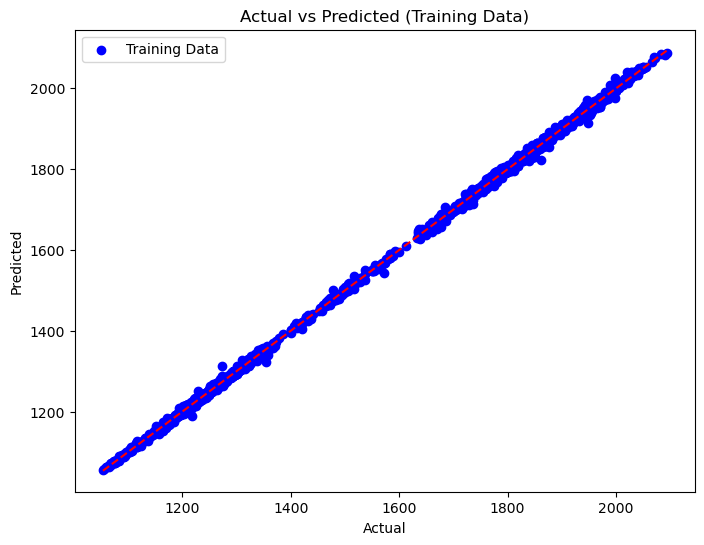

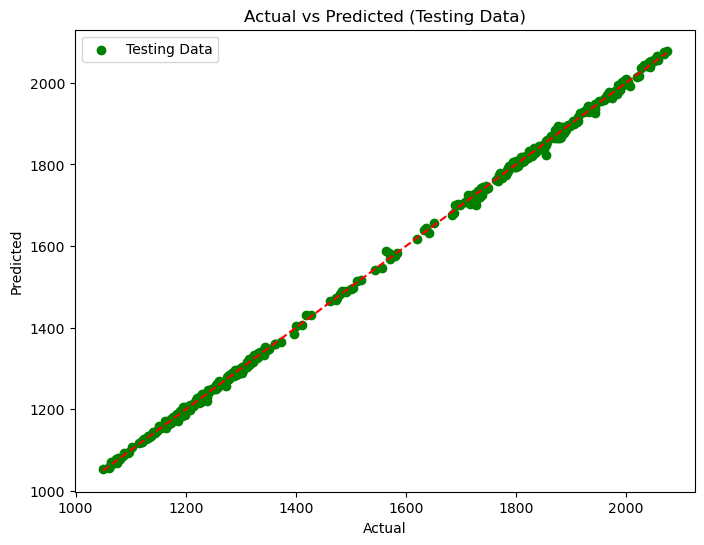

In [23]:


# predictions on the training data
y_train_pred = lm.predict(x_train)

# Plotting the actual vs predicted values for the training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], linestyle='--', color='red')  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Training Data)')
plt.legend()
plt.show()

# predictions on the testing data
y_test_pred = lm.predict(x_test)

# Plotting the actual vs predicted values for the testing data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Testing Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Testing Data)')
plt.legend()
plt.show()


insights:
    As we have good accurancy for both test and train so we can say that our model is Generalized

the residual points are primarily between -10 and 10, it suggests that the model's predictions are relatively close to the 
actual values, as the residuals (the differences between the actual and predicted values) are within a narrow range around zero. 
Residuals between -10 and 10 suggest that the model's predictions typically deviate from the actual values by no more than 10 units.
that most residual values fall within this range indicates that the model has low prediction error.

In [24]:

#  Mean Squared Error (MSE) for training data
mse_train = mse(y_train, y_train_pred)

#  R-squared (R2) for training data
r2_train = r2_score(y_train, y_train_pred)

# Print MSE and R2 for training data
print("Mean Squared Error (MSE) for training data:", mse_train)
print("R-squared (R2) for training data:", r2_train)

#  Mean Squared Error (MSE) for testing data
mse_test = mse(y_test, y_test_pred)

#  R-squared (R2) for testing data
r2_test = r2_score(y_test, y_test_pred)

#  MSE and R2 for testing data
print("Mean Squared Error (MSE) for testing data:", mse_test)
print("R-squared (R2) for testing data:", r2_test)


Mean Squared Error (MSE) for training data: 32.58177485819339
R-squared (R2) for training data: 0.9996286432698391
Mean Squared Error (MSE) for testing data: 33.10359235189278
R-squared (R2) for testing data: 0.9996521447203367


r^2 value of 0.99 suggests that 99% of the variance in the target variable is explained by the independent variables in 
the model.This high r2 value indicates that the model fits the data very closely, and it can make accurate predictions.
A lower MSE indicates better performance, as it means that the model's predictions are closer to the actual values on average.

In [25]:

threshold = 1000 
df['Close_binary'] = (df['Close'] > threshold).astype(int)

print(df.head())


   Unnamed: 0       Date   Close    Volume    Open    High     Low  dayofweek  \
0           0 2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2          4   
1           1 2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7          3   
2           2 2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6          2   
3           3 2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6          1   
4           4 2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1          4   

   Month  Year  Close_binary  
0      1  2024             1  
1      1  2024             1  
2      1  2024             1  
3      1  2024             1  
4      1  2024             1  


converting the "Close" feature to binary for predicting buy or sell decisions

In [26]:
import pandas as pd

# Defining moving average window lengths
short_window = 20
long_window = 50

# Calculating moving averages
df['Short_MA'] = df['Close'].rolling(window=short_window, min_periods=1).mean()
df['Long_MA'] = df['Close'].rolling(window=long_window, min_periods=1).mean()

# Generate buy/sell signals
df['Signal'] = 0
df.loc[df['Short_MA'] > df['Long_MA'], 'Signal'] = 1  # Buy signal
df.loc[df['Short_MA'] < df['Long_MA'], 'Signal'] = -1  # Sell signal

# Determine whether to buy or sell
df['Action'] = 'Hold'
df.loc[df['Signal'] == 1, 'Action'] = 'Buy'
df.loc[df['Signal'] == -1, 'Action'] = 'Sell'

# Display the DataFrame with buy/sell signals
print(df[['Close', 'Short_MA', 'Long_MA', 'Signal', 'Action']])


       Close     Short_MA      Long_MA  Signal Action
0     2029.3  2029.300000  2029.300000       0   Hold
1     2021.6  2025.450000  2025.450000       0   Hold
2     2006.5  2019.133333  2019.133333       0   Hold
3     2030.2  2021.900000  2021.900000       0   Hold
4     2051.6  2027.840000  2027.840000       0   Hold
...      ...          ...          ...     ...    ...
2506  1250.5  1286.365000  1310.842000      -1   Sell
2507  1263.5  1282.405000  1309.930000      -1   Sell
2508  1264.5  1278.730000  1309.254000      -1   Sell
2509  1262.5  1275.675000  1308.434000      -1   Sell
2510  1238.6  1271.760000  1307.514000      -1   Sell

[2511 rows x 5 columns]


#(SMA) for the 'Close' prices of a stock over two different periods: a short-term period (20 days) and a long-term period (50 days).(sma used to smooth out short-term fluctuations and highlight longer-term trends or cycles in data.)



it generates a buy signal, and when the short-term moving average crosses below the long-term moving average,
it generates a sell signal. The actions ('Buy', 'Sell', or 'Hold') are determined based on these signals.

In [27]:
new_data=[[400000,1900,2000,1800,5,1,2024]]
y_pred_new=lm.predict(new_data)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:

# Defining new data as a DataFrame with proper column names
new_data = pd.DataFrame([[400000, 1900, 2000, 1800, 5, 1, 2024]], columns=['Volume', 'Open', 'High', 'Low', 'dayofweek', 'Month', 'Year'])

# Making predictions on the new data
y_pred_new = lm.predict(new_data)

# Printing the predicted value
print("Predicted value:", y_pred_new)



Predicted value: [[1898.31040042]]


In [29]:
# Defining thresholds for buy and sell signals
buy_threshold = 0.5  # Adjust threshold as needed
sell_threshold = -0.5  # Adjust threshold as needed

# Determining action based on predicted value
if y_pred_new > buy_threshold:
    action = "Buy"
elif y_pred_new < sell_threshold:
    action = "Sell"
else:
    action = "Hold"

# Printing the recommended action
print("Recommended Action:", action)


Recommended Action: Buy
